# Math 227C Problem Set 7

How does the size of the mitochondria in a cell depend on the size of the cell itself?

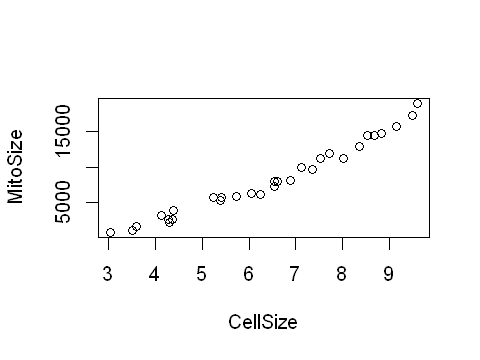

In [2]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

# Simulate power-law data

N <- 30
alpha <- 2.3
Y0 <- 100
sigma <- 500

CellSize <- runif(N,3,10) # independent variable
eps <- rnorm(N,0,sigma) # residuals

MitoSize <- Y0*CellSize^alpha + eps

plot(CellSize,MitoSize)

## Part 1 

__(a)__ Use nonlinear least squares (nls) to estimate the parameter $\alpha$ from the simulated data.

b          a 
121.864894   2.208875

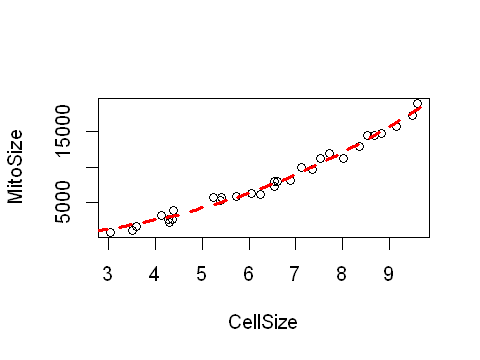

In [6]:
modelMitoSize <- nls(MitoSize~b*CellSize^a, start=list(b=1,a=5))
coef(modelMitoSize) # show coefficients

plot(CellSize,MitoSize)
# plot model prediction
cellSizeAxis <- seq(0,10,length=100)
b <- coef(modelMitoSize)[1]
a <- coef(modelMitoSize)[2]
mitoSizePrediction <- b*cellSizeAxis^a

lines(cellSizeAxis,mitoSizePrediction,col="red",lty=2,lwd=3)

In [19]:
coef(modelMitoSize)[[a]]

[1] 2.208875

Define the __error__ as $e=|\hat{\alpha}-\alpha|$ where $\hat{\alpha}$ is the estimate and $\alpha$ is the true value (which is known because this is simualted data). 

__(b)__ Write a function to execute the simulation and nls fitting, taking in the true model parameters $\alpha, y_0, \sigma$ and the sample size $N$. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

In [49]:
nlssimulation <- function(alpha,y0,sigma,N) {
    CellSize <- runif(N,3,10) # independent variable
    eps <- rnorm(N,0,sigma) # residuals
    MitoSize <- Y0*CellSize^alpha + eps
    modelMitoSize <- nls(MitoSize~b*CellSize^a, start=list(b=1,a=5))
    return(coef(modelMitoSize)[[a]])
}
nlserror<-c()
sigmalist <- seq(100,2000,length=100)
for (s in sigmalist)
{
    ahat<-nlssimulation(alpha,y0,s,N)
    e=abs(alpha-ahat)
    nlserror=append(nlserror,e)
}

## Part 2

__(a)__ Transform the simulated data to $lY = \mbox{log}(y)$ and $lX = \mbox{log}(x)$. Use linear regression model fit (lm) to estimate the parameter $\alpha$ from the simulated data.

logCellSize 
   2.440081

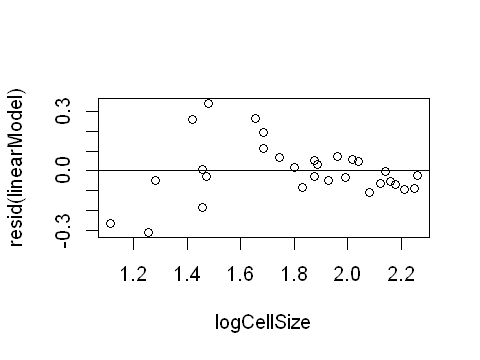

In [35]:
logMitoSize <- log(MitoSize)
logCellSize <- log(CellSize)
linearModel = lm(logMitoSize~logCellSize)

coef(linearModel)['logCellSize']
# plot residuals
plot(logCellSize,resid(linearModel))
abline(0,0)

__(b)__ Write a function that executes the simulation, log-transforms the data, and performs linear regression fitting. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

Note you may need additional code to handle negative measurements.

__(c)__ Overplot the error in $\alpha$ from nls and the error from lm (as functions of $\sigma$). 

In [38]:
lmsimulation <- function(alpha,y0,sigma,N) {
    CellSize <- runif(N,3,10) # independent variable
    eps <- rnorm(N,0,sigma) # residuals
    MitoSize <- Y0*CellSize^alpha + eps
    logMitoSize <- log(MitoSize)
    logCellSize <- log(CellSize)
    linearModel = lm(logMitoSize~logCellSize)
    return(coef(linearModel)[['logCellSize']])
}
lmerror<-c()
sigmalist <- seq(100,2000,length=100)
for (s in sigmalist)
{
    ahat<-lmsimulation(alpha,y0,s,N)
    e=abs(alpha-ahat)
    lmerror=append(lmerror,e)
}

Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"
Warning message in log(MitoSize):
"NaNs produced"


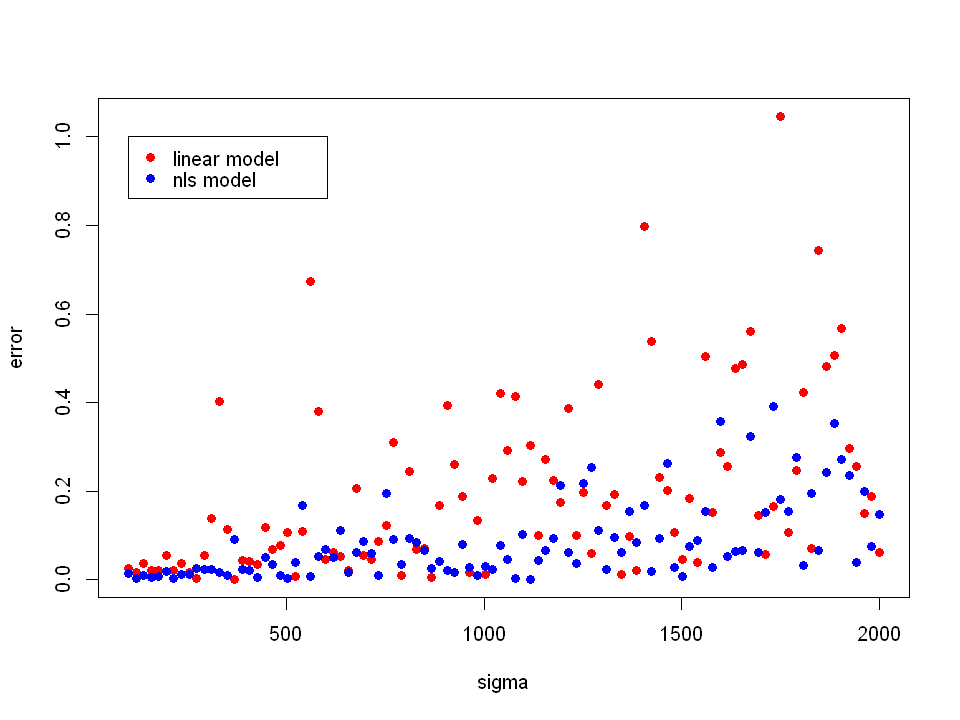

In [80]:
options(repr.plot.width=8,repr.plot.height=6)
plot(sigmalist,lmerror,col='red',pch=19,xlab='sigma',ylab='error')
points(sigmalist,nlserror,col='blue',pch=19)
legend(100,1,legend=c("linear model","nls model"),col=c("red","blue"),bty='o',pch=c(19,19))

## Part 3

In the above simulations, the independent variable $X$ was chosen from a uniform distribution.

__(a)__ Find a distribution of $X$ data that makes a very big difference between error from nls and error from lm.

__(b)__ Find a distribution of $X$ data that makes a very small difference between the error from nls and error from lm.